## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from keras.callbacks import ModelCheckpoint

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

'Code Here\n撰寫你的訓練流程並將結果用 dictionary 紀錄\n'

In [9]:
save_best_only = True
checkpoint_file = "./tmp1.h5"

model_ckpt = ModelCheckpoint(filepath=checkpoint_file , 
                             monitor="val_loss", 
                             save_best_only=save_best_only)
model = build_mlp(input_shape=x_train.shape[1:])
# model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]


# Load back
model = keras.models.load_model(checkpoint_file )
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
results["save_best_only={0}".format(save_best_only)]={
    'loss':train_loss,'val_loss':valid_loss,'accuracy':train_acc,'val_accuracy':valid_acc,
    'loss_loadback':loss_loadback,'acc_loadback': acc_loadback}

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 59us/step - loss: 2.2097 - accuracy: 0.2680 - val_loss: 2.1381 - val_accuracy: 0.1856
Epoch 2/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7282 - accuracy: 0.3940 - val_loss: 1.9604 - val_accuracy: 0.2894
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.6056 - accuracy: 0.4372 - val_loss: 1.8421 - val_accuracy: 0.3529
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5335 - accuracy: 0.4605 - val_loss: 1.7266 - val_accuracy: 0.4008
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4810 - accuracy: 0.4793 - val_loss: 1.6643 - val_accuracy: 0.4131
Epoch 6/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4351 - accuracy: 0.4976 - val_loss: 1.6156 - val_accuracy: 0.4306
Epoch 7/50
50000/50000 [==============================] - 2s 45us/st

In [10]:
save_best_only = True
checkpoint_file = "./tmp1.h5"

model_ckpt = ModelCheckpoint(filepath=checkpoint_file , 
                             monitor="val_loss", 
                             save_best_only=save_best_only)
model = build_mlp(input_shape=x_train.shape[1:])
# model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]


# Load back
model = keras.models.load_model(checkpoint_file )
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
results["save_best_only={0}".format(save_best_only)]={
    'loss':train_loss,'val_loss':valid_loss,'accuracy':train_acc,'val_accuracy':valid_acc,
    'loss_loadback':loss_loadback,'acc_loadback': acc_loadback}

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.1808 - accuracy: 0.2789 - val_loss: 2.1480 - val_accuracy: 0.1927
Epoch 2/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.7320 - accuracy: 0.3963 - val_loss: 1.9577 - val_accuracy: 0.3105
Epoch 3/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6083 - accuracy: 0.4382 - val_loss: 1.8067 - val_accuracy: 0.3722
Epoch 4/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5344 - accuracy: 0.4623 - val_loss: 1.6929 - val_accuracy: 0.4209
Epoch 5/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4821 - accuracy: 0.4812 - val_loss: 1.6381 - val_accuracy: 0.4344
Epoch 6/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4383 - accuracy: 0.4966 - val_loss: 1.5900 - val_accuracy: 0.4399
Epoch 7/50
50000/50000 [==============================] - 2s 42us/st

In [11]:
save_best_only = False
checkpoint_file = "./tmp2.h5"

model_ckpt = ModelCheckpoint(filepath=checkpoint_file , 
                             monitor="val_loss", 
                             save_best_only=save_best_only)
model = build_mlp(input_shape=x_train.shape[1:])
# model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]


# Load back
model = keras.models.load_model(checkpoint_file )
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
results["save_best_only={0}".format(save_best_only)]={
    'loss':train_loss,'val_loss':valid_loss,'accuracy':train_acc,'val_accuracy':valid_acc,
    'loss_loadback':loss_loadback,'acc_loadback': acc_loadback}

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.2311 - accuracy: 0.2677 - val_loss: 2.1354 - val_accuracy: 0.2244
Epoch 2/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.7417 - accuracy: 0.3931 - val_loss: 1.9856 - val_accuracy: 0.2904
Epoch 3/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6149 - accuracy: 0.4348 - val_loss: 1.8470 - val_accuracy: 0.3559
Epoch 4/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5415 - accuracy: 0.4607 - val_loss: 1.7279 - val_accuracy: 0.4013
Epoch 5/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4850 - accuracy: 0.4819 - val_loss: 1.6446 - val_accuracy: 0.4308
Epoch 6/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4387 - accuracy: 0.4966 - val_loss: 1.5850 - val_accuracy: 0.4475
Epoch 7/50
50000/50000 [==============================] - 2s 42us/st

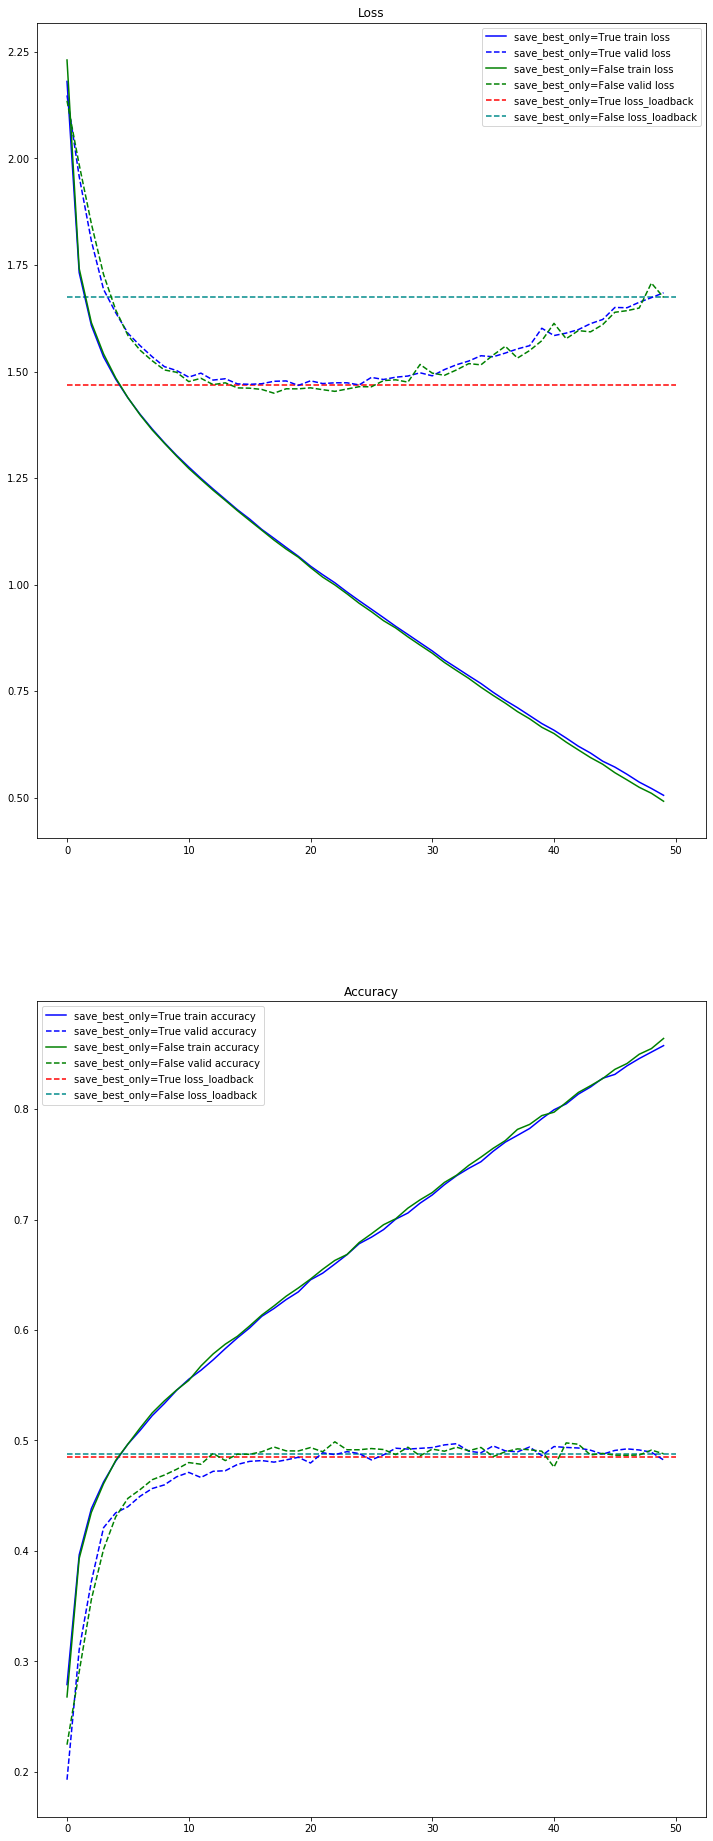

In [12]:

"""Code Here
將結果繪出
"""
cls=['b','g','r','c','m']
cls_h = ['r','darkcyan']

i=0
plt.figure(figsize=(12,33))
plt.subplot(2,1,1)
for label,res in results.items():
    train_loss=res['loss']
    valid_loss=res['val_loss']
    loss_loadback=res['loss_loadback']
    plt.plot(range(len(train_loss)), train_loss,'-',color=cls[i], label="{} train loss".format(label))
    plt.plot(range(len(valid_loss)), valid_loss,'--',color=cls[i], label="{} valid loss".format(label))
    plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors=cls_h[i], linestyles='--',
               label="{} loss_loadback".format(label))
    plt.legend()
    plt.title("Loss")
    i+=1
    
i=0
plt.subplot(2,1,2)
for label,res in results.items():
    train_acc=res['accuracy']
    valid_acc=res['val_accuracy']
    acc_loadback=res['acc_loadback']
    plt.plot(range(len(train_acc)), train_acc,'-',color=cls[i], label="{} train accuracy".format(label))
    plt.plot(range(len(valid_acc)), valid_acc,'--',color=cls[i], label="{} valid accuracy".format(label))
    plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors=cls_h[i], linestyles='--' ,
               label="{} loss_loadback".format(label))
    plt.legend()
    plt.title("Accuracy")
    i+=1
    
    
plt.show()

In [13]:
save_weights_only = True
checkpoint_file = "./tmp3.h5"

model_ckpt = ModelCheckpoint(filepath=checkpoint_file , 
                             monitor="val_loss", 
                            save_weights_only= save_weights_only)
model = build_mlp(input_shape=x_train.shape[1:])
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]





Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.1962 - accuracy: 0.2768 - val_loss: 2.1329 - val_accuracy: 0.2317
Epoch 2/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7266 - accuracy: 0.3963 - val_loss: 1.9832 - val_accuracy: 0.2928
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.6051 - accuracy: 0.4383 - val_loss: 1.8280 - val_accuracy: 0.3630
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5329 - accuracy: 0.4638 - val_loss: 1.7153 - val_accuracy: 0.3991
Epoch 5/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4815 - accuracy: 0.4841 - val_loss: 1.6355 - val_accuracy: 0.4219
Epoch 6/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4355 - accuracy: 0.4991 - val_loss: 1.5794 - val_accuracy: 0.4442
Epoch 7/50
50000/50000 [==============================] - 2s 46us/st

In [14]:
# Load back
results={}
load_model = build_mlp(input_shape=x_train.shape[1:])
load_model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
load_model.load_weights(checkpoint_file )
loss_loadback, acc_loadback = load_model.evaluate(x_test, y_test)
results["save_best_only={0}".format(save_best_only)]={
    'loss':train_loss,'val_loss':valid_loss,'accuracy':train_acc,'val_accuracy':valid_acc,
    'loss_loadback':loss_loadback,'acc_loadback': acc_loadback}

10000/10000 [==============================] - 1s 88us/step


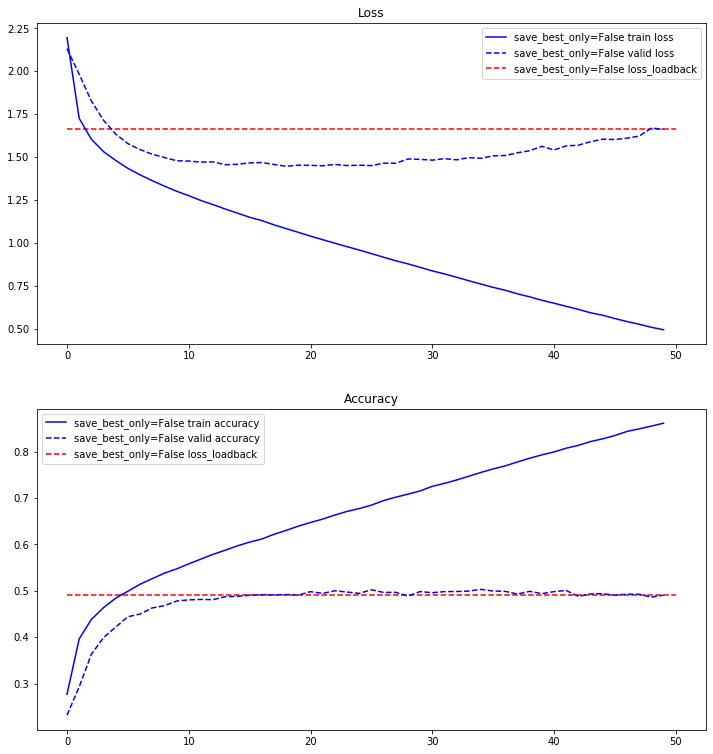

In [15]:

"""Code Here
將結果繪出
"""
cls=['b','g','r','c','m']
cls_h = ['r','darkcyan']

i=0
plt.figure(figsize=(12,13))
plt.subplot(2,1,1)
for label,res in results.items():
    train_loss=res['loss']
    valid_loss=res['val_loss']
    loss_loadback=res['loss_loadback']
    plt.plot(range(len(train_loss)), train_loss,'-',color=cls[i], label="{} train loss".format(label))
    plt.plot(range(len(valid_loss)), valid_loss,'--',color=cls[i], label="{} valid loss".format(label))
    plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors=cls_h[i], linestyles='--',
               label="{} loss_loadback".format(label))
    plt.legend()
    plt.title("Loss")
    i+=1
    
i=0
plt.subplot(2,1,2)
for label,res in results.items():
    train_acc=res['accuracy']
    valid_acc=res['val_accuracy']
    acc_loadback=res['acc_loadback']
    plt.plot(range(len(train_acc)), train_acc,'-',color=cls[i], label="{} train accuracy".format(label))
    plt.plot(range(len(valid_acc)), valid_acc,'--',color=cls[i], label="{} valid accuracy".format(label))
    plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors=cls_h[i], linestyles='--' ,
               label="{} loss_loadback".format(label))
    plt.legend()
    plt.title("Accuracy")
    i+=1
    
    
plt.show()